In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Owner and Taxi Dataset

In [3]:
# Taxi Owner

ov = pd.read_csv("taxi_owner.csv")
ov[:5]

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [4]:
# Taxi Vehicle

ot = pd.read_csv("taxi_vehicle.csv")
ot[:5]

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


### Inner Join

**What column to merge on?**

In [5]:
tov = pd.merge(ov, ot, on = "vid", suffixes = ("_own", "_veh"))
tov

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.
...,...,...,...,...,...,...,...,...,...,...
3514,T4453,4453,IMAGIN CAB CORP,3351 W. ADDISON ST.,60618,FORD,ESCAPE,2010,HYBRID,IMAGIN CAB CORP
3515,T121,121,TRIBECA CAB CORP,4536 N. ELSTON AVE.,60630,FORD,C-MAX,2014,HYBRID,TRIBECA CAB CORP
3516,T3465,3465,AMIR EXPRESS INC,3351 W. ADDISON ST.,60618,TOYOTA,CAMRY,2014,HYBRID,AMIR EXPRESS INC
3517,T1962,1962,KARY CAB COMPANY,4707 N. KENTON AVE.,60630,TOYOTA,CAMRY,2014,HYBRID,KARY CAB COMPANY


In [6]:
# Print the value_counts to find the most popular fuel_type
pf = tov["fuel_type"].value_counts().to_frame().reset_index()
pf.columns = ["Fuel Type", "Cars"]
pf

,Fuel Type,Cars
0,HYBRID,2792
1,GASOLINE,611
2,FLEX FUEL,89
3,COMPRESSED NATURAL GAS,27


### Inner joins and number of rows returned

In [7]:
w = pd.read_csv("wards.csv")
w[:5]

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [8]:
c = pd.read_csv("census.csv")
c[:5]

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [9]:
wc = pd.merge(w, c, on = "ward")
wc.shape

(50, 9)

**Merge the wards_altered and census tables on the ward column**

In [10]:
wa = pd.read_csv("wards_altered.csv")
wa[:5]

,ward,alderman,address,zip
0,61,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [11]:
wac = pd.merge(wa, c, on = "ward")
wac.shape

(49, 9)

In [12]:
ca = pd.read_csv("census_altered.csv")
ca["ward"] = ca["ward"].replace("None", np.nan)
ca[:5]

,ward,pop_2000,pop_2010,change,address,zip
0,NaN,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [13]:
ca = ca.dropna()
ca["ward"] = ca["ward"].astype("int")

In [14]:
wca = pd.merge(w, ca, on = "ward")
wca.shape

(49, 9)

### One-to-many merge

In [15]:
l = pd.read_csv("licenses.csv")
l[:5]

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616.0
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633.0
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632.0
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609.0
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613.0


In [16]:
bo = pd.read_csv("biz_owner.csv")
bo[:5]

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [17]:
bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account     21352 non-null  int64 
 1   first_name  20721 non-null  object
 2   last_name   20695 non-null  object
 3   title       21341 non-null  object
dtypes: int64(1), object(3)
memory usage: 667.4+ KB


In [18]:
l_bo = pd.merge(l, bo, on = "account")
l_bo[:5]

,account,ward,aid,business,address,zip,first_name,last_name,title
0,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633.0,PEARL,SHERMAN,PRESIDENT
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633.0,PEARL,SHERMAN,SECRETARY
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632.0,WALTER,MROZEK,PARTNER
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632.0,CELINA,BYRDAK,PARTNER
4,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609.0,IRENE,ROSENFELD,PRESIDENT


In [19]:
# Group the results by title then count the number of accounts
tc = l_bo.groupby("title")["account"].agg(["count"]).reset_index()
tc.columns = ["Job Title", "Total"]


# Sort the counted_df in desending order
tc.sort_values(by = "Total", ascending = False)

,Job Title,Total
13,PRESIDENT,3234
15,SECRETARY,3015
11,OTHER,963
17,SOLE PROPRIETOR,544
21,VICE PRESIDENT,521
19,TREASURER,264
16,SHAREHOLDER,241
12,PARTNER,239
9,MEMBER,167
0,ASST. SECRETARY,81


### Total riders in a month

In [20]:
# Calender
cal = pd.read_csv("calender.csv")
cal[:5]

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [21]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      365 non-null    int64 
 1   month     365 non-null    int64 
 2   day       365 non-null    int64 
 3   day_type  365 non-null    object
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [22]:
# Riders
r = pd.read_csv("ridership.csv")
r[:5]

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [23]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   station_id  3285 non-null   int64
 1   year        3285 non-null   int64
 2   month       3285 non-null   int64
 3   day         3285 non-null   int64
 4   rides       3285 non-null   int64
dtypes: int64(5)
memory usage: 128.4 KB


In [24]:
# Stations
s = pd.read_csv("stations.csv")
s[:5]

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [25]:
# Merge the ridership and calender tables

rcs = pd.merge(r, cal, on = ["year", "month", "day"]).merge(s, on = "station_id")
rcs[:5]

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [26]:
# Create a filter to filter ridership_cal_stations

filter_condition = rcs[(rcs["station_name"] == "Wilson") &
                       (rcs["day_type"] == "Weekday") &
                       (rcs["month"] == 7)]
filter_condition

,station_id,year,month,day,rides,day_type,station_name,location
1641,40540,2019,7,1,6464,Weekday,Wilson,"(41.964273, -87.657588)"
1642,40540,2019,7,2,6491,Weekday,Wilson,"(41.964273, -87.657588)"
1643,40540,2019,7,3,6639,Weekday,Wilson,"(41.964273, -87.657588)"
1645,40540,2019,7,5,4794,Weekday,Wilson,"(41.964273, -87.657588)"
1648,40540,2019,7,8,6351,Weekday,Wilson,"(41.964273, -87.657588)"
1649,40540,2019,7,9,6483,Weekday,Wilson,"(41.964273, -87.657588)"
1650,40540,2019,7,10,6550,Weekday,Wilson,"(41.964273, -87.657588)"
1651,40540,2019,7,11,6591,Weekday,Wilson,"(41.964273, -87.657588)"
1652,40540,2019,7,12,6309,Weekday,Wilson,"(41.964273, -87.657588)"
1655,40540,2019,7,15,6298,Weekday,Wilson,"(41.964273, -87.657588)"


**Total rides by filter condition**

In [27]:
print("Total rides in july by wilson location on weekdays =", filter_condition["rides"].sum())

Total rides in july by wilson location on weekdays = 140005


In [28]:
zd = pd.read_csv("zip_demo.csv")
zd[:5]

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [29]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   account   10000 non-null  int64  
 1   ward      10000 non-null  int64  
 2   aid       4657 non-null   object 
 3   business  10000 non-null  object 
 4   address   10000 non-null  object 
 5   zip       9996 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [30]:
lzw = pd.merge(l, zd, on = "zip").merge(w, on = "ward")
lzw[:5]

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616.0,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616.0,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
2,15015,3,NaN,"SOUTHVIEW MANOR, INC.",3311 S MICHIGAN AVE,60616.0,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
3,19168,3,666,BP AMOCO,3101 S MICHIGAN AVE 1ST,60616.0,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
4,205980,3,763,J & J FISH & CHICKEN,8 E CERMAK RD,60616.0,46340,Pat Dowell,5046 SOUTH STATE STREET,60609


In [31]:
am = lzw.groupby("alderman")["income"].agg(["median"]).reset_index()
am.columns = ["alderman", "Median Income"]
am.sort_values(by = "Median Income", ascending = False)

,alderman,Median Income
4,Brendan Reilly,110215
48,William D. Burns,107811
32,Michelle Smith,100116
45,Tom Tunney,88708
5,Brian Hopkins,87143
38,"Proco ""Joe"" Moreno",87143
47,"Walter Burnett, Jr.",87143
2,Anthony V. Napolitano,82226
21,James Cappleman,79565
26,Margaret Laurino,70122


### One-to-many merge with multiple tables

In [32]:
lu = pd.read_csv("land_use.csv")
lu[:5]

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [33]:
# Merge land_use and census and merge result with licenses including suffixes

lan_cen_li = pd.merge(lu, c, on = "ward").merge(l, on = "ward", suffixes = ["_census", "_license"])
lan_cen_li[:3]

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_census,zip_census,account,aid,business,address_license,zip_license
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622.0
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622.0
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647.0


In [34]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
wpv_a = lan_cen_li.groupby(["ward", "pop_2010", "vacant"])["account"].agg(["count"]).reset_index()
wpv_a.columns = ["ward", "pop_2010", "vacant", "accounts"]
wpv_a.sort_values(by = ["vacant", "accounts", "pop_2010"], ascending = [False, True, True])

,ward,pop_2010,vacant,accounts
6,7,51581,19,80
19,20,52372,15,123
9,10,51535,14,130
23,24,54909,13,98
15,16,51954,13,156
2,3,53039,13,173
27,28,55199,11,189
5,6,52341,8,149
33,34,51599,7,99
21,22,53515,7,156


### Counting missing rows with left join

In [35]:
m = pd.read_csv("movies.csv")
m[:5]

,id,title,popularity,release_date
0,257,Oliver Twist,20.42,2005-09-23
1,14290,Better Luck Tomorrow,3.88,2002-01-12
2,38365,Grown Ups,38.86,2010-06-24
3,9672,Infamous,3.68,2006-11-16
4,12819,Alpha and Omega,12.30,2010-09-17


In [36]:
f = pd.read_csv("financials.csv")
f[:5]

,id,budget,revenue
0,19995,237000000,2787965000
1,285,300000000,961000000
2,206647,245000000,880674600
3,49026,250000000,1084939000
4,49529,260000000,284139100


In [37]:
# Merge the movies table with the financials table with a left join
mf_l = pd.merge(m, f, on = "id", how = "left")
mf_l[:5]

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.42,2005-09-23,50000000.0,42093710.0
1,14290,Better Luck Tomorrow,3.88,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.86,2010-06-24,80000000.0,271430200.0
3,9672,Infamous,3.68,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.30,2010-09-17,20000000.0,39300000.0


In [38]:
# Count the number of rows in the budget column that are missing
print("Null Values in Budget Column are =", mf_l["budget"].isnull().sum())

Null Values in Budget Column are = 1574


### Enriching a dataset

In [39]:
ts = pd.read_csv("toy_story.csv")
ts[:5]

,id,title,popularity,release_date
0,10193,Toy Story 3,59.995418,2010-06-16
1,863,Toy Story 2,73.575118,1999-10-30
2,862,Toy Story,73.640445,1995-10-30


In [40]:
tl = pd.read_csv("taglins.csv")
tl[:5]

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [41]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3955 non-null   int64 
 1   tagline  3955 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.9+ KB


In [42]:
# Ecriching a dataset
ts_tl = pd.merge(ts, tl, on = "id", how = "left")
ts_tl[:5]

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [43]:
ts_tl_i = pd.merge(ts, tl, on = "id", how = "inner")
ts_tl_i[:5]

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


### Right join to find unique movies

In [44]:
am = pd.read_csv("action_movies.csv")
am[:5]

,movie_id,genre
0,11,Action
1,18,Action
2,22,Action
3,24,Action
4,58,Action


In [45]:
sm = pd.read_csv("scifi_movies.csv")
sm[:5]

,movie_id,genre
0,11,Science Fiction
1,18,Science Fiction
2,19,Science Fiction
3,38,Science Fiction
4,62,Science Fiction


In [46]:
# Merge action_movies to scifi_movies with right join
am_sm = pd.merge(am, sm, on = "movie_id", how = "right", suffixes = ["_act", "_sci"])
am_sm[:5]

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [47]:
# From action_scifi, select only the rows where the genre_act column is null
am_sm_n = am_sm[am_sm["genre_act"].isnull()]
am_sm_n[:5]

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [48]:
# Merge the movies and scifi_only tables with an inner join
m_sf = pd.merge(m, am_sm_n, left_on = "id", right_on = "movie_id", how = "inner")
m_sf[:5]

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.68,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.44,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.90,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.45,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.35,1991-07-19,1649,NaN,Science Fiction


In [49]:
m_sf.shape

(258, 7)

### Concatenation basics

In [50]:
tm = pd.read_csv("track_master.csv")
tm[:5]

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrichm,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [51]:
tr = pd.read_csv("tracks_ride.csv")
tr

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [52]:
ts = pd.read_csv("tracks_st.csv")
ts

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99


In [53]:
tracks_from_albums = pd.concat([tm, tr, ts])
tracks_from_albums

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrichm,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99
0,1874,Fight Fire With Fire,154,1,3,NaN,0.99
1,1875,Ride The Lightning,154,1,3,NaN,0.99
2,1876,For Whom The Bell Tolls,154,1,3,NaN,0.99
3,1877,Fade To Black,154,1,3,NaN,0.99
4,1878,Trapped Under Ice,154,1,3,NaN,0.99
0,1882,Frantic,155,1,3,NaN,0.99
1,1883,St. Anger,155,1,3,NaN,0.99


In [54]:
tracks_from_albums = pd.concat([tm, tr, ts], ignore_index = True)
tracks_from_albums

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrichm,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99
3,1874,Fight Fire With Fire,154,1,3,NaN,0.99
4,1875,Ride The Lightning,154,1,3,NaN,0.99
5,1876,For Whom The Bell Tolls,154,1,3,NaN,0.99
6,1877,Fade To Black,154,1,3,NaN,0.99
7,1878,Trapped Under Ice,154,1,3,NaN,0.99
8,1882,Frantic,155,1,3,NaN,0.99
9,1883,St. Anger,155,1,3,NaN,0.99


In [55]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tm, tr, ts], join = "inner", sort = True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99


### Concatenating with keys

In [56]:
july = pd.read_csv("inv_july.csv")
july[:5]

,iid,cid,invoice_date,total,bill_ctry
0,42,51,06/07/2009,1.98,Sweden
1,43,53,06/07/2009,1.98,UK
2,44,55,07/07/2009,3.96,Australia
3,45,59,08/07/2009,5.94,India
4,46,6,11/07/2009,8.91,Czech Republic


In [57]:
august = pd.read_csv("inv_aug.csv")
august[:5]

,iid,cid,invoice_date,total,bill_ctry
0,49,30,06/08/2009,1.98,Canada
1,50,32,06/08/2009,1.98,Canada
2,51,34,07/08/2009,3.96,Portugal
3,52,38,08/08/2009,5.94,Germany
4,53,44,11/08/2009,8.91,Finland


In [58]:
september = pd.read_csv("inv_sep.csv")
september[:5]

,iid,cid,invoice_date,total,bill_ctry
0,56,9,06/09/2009,1.98,Denmark
1,57,11,06/09/2009,1.98,Brazil
2,58,13,07/09/2009,3.96,Brazil
3,59,17,08/09/2009,5.94,USA
4,60,23,11/09/2009,8.91,USA


In [59]:
# Concatenate the tables and add keys'
inv_jul_aug_sep = pd.concat([july, august, september],
                            keys = ["Jul", "Aug", "Sep"])
inv_jul_aug_sep[:5]

iid  cid invoice_date  total       bill_ctry
Jul 0   42   51   06/07/2009   1.98          Sweden
    1   43   53   06/07/2009   1.98              UK
    2   44   55   07/07/2009   3.96       Australia
    3   45   59   08/07/2009   5.94           India
    4   46    6   11/07/2009   8.91  Czech Republic

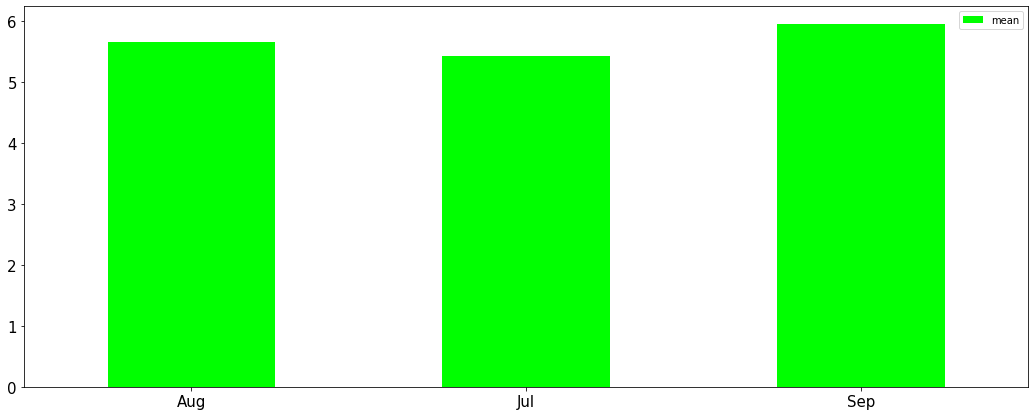

In [60]:
# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_aug_sep.groupby(level=0)["total"].agg(["mean"])
avg_inv_by_month.plot(kind = "bar", figsize = (18, 7), color = "lime")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Correlation between GDP and S&P500

In [61]:
gdp = pd.read_csv("usa_gdp.csv")
gdp[:5]

,country code,year,gdp
0,USA,2010,14992100000000
1,USA,2011,15542600000000
2,USA,2012,16197000000000
3,USA,2012,16197000000000
4,USA,2013,16784800000000


In [62]:
sp500 = pd.read_csv("sp500.csv")
sp500[:5]

,date,returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [63]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on = "year", right_on = "date", how = "left", fill_method='ffill')
gdp_sp500

,country code,year,gdp,date,returns
0,USA,2010,14992100000000,2010,12.78
1,USA,2011,15542600000000,2011,0.00
2,USA,2012,16197000000000,2012,13.41
3,USA,2012,16197000000000,2012,13.41
4,USA,2013,16784800000000,2013,29.60
5,USA,2014,17521700000000,2014,11.39
6,USA,2015,18219300000000,2015,-0.73
7,USA,2016,18707200000000,2016,9.54
8,USA,2017,19485400000000,2017,19.42
9,USA,2018,20494100000000,2017,19.42


In [64]:
gdp_sp500[["gdp", "returns"]].corr()

,gdp,returns
gdp,1.000000,0.212173
returns,0.212173,1.000000


### Phillips curve using merge_ordered()

In [65]:
inf = pd.read_csv("inflation.csv")
inf[:3]

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [66]:
un_emp = pd.read_csv("unemployment.csv")
un_emp[:3]

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1


In [67]:
inf_unemp = pd.merge(inf, un_emp, on = "date", how = "inner")
inf_unemp

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


In [68]:
inf_unemp = pd.merge_ordered(inf, un_emp, on = "date", how = "inner")
inf_unemp

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


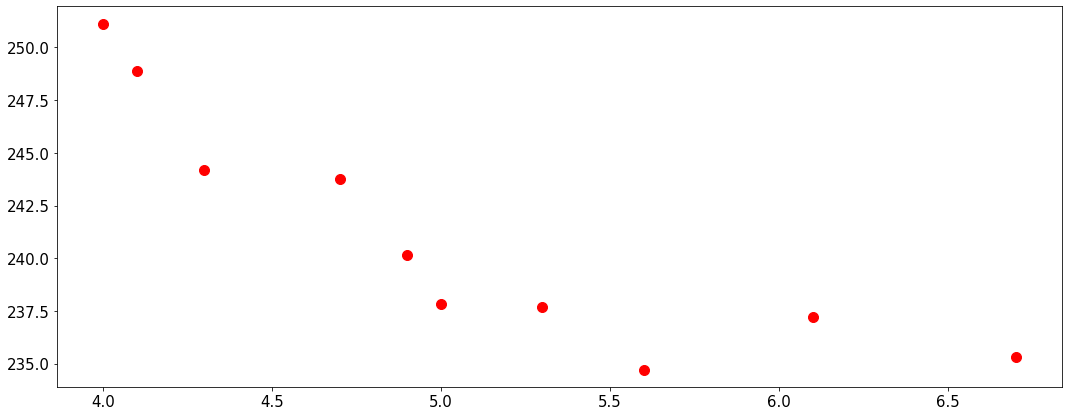

In [69]:
plt.figure(figsize = (18, 7))
plt.scatter(x = "unemployment_rate", y = "cpi", data = inf_unemp, s = 100, color = "red")
plt.title("")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [70]:
gdp = pd.read_csv("gdp.csv")
gdp = gdp[gdp.columns.drop("Unnamed: 4")]
gdp[:5]

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD


In [71]:
pop = pd.read_csv("pop.csv")
pop[:5]

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL


In [72]:
gdp_pop = pd.merge_ordered(gdp, pop, on = ["date", "country"], how = "outer", 
                           fill_method = "ffill", suffixes = ["_gdp", "_pop"])
gdp_pop[:5]

,date,country,gdp,series_code_gdp,pop,series_code_pop
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL


In [73]:
gdp_pop = pd.merge_ordered(gdp, pop, on = ["country", "date"], how = "outer", 
                           fill_method = "ffill", suffixes = ["_gdp", "_pop"])
gdp_pop[:5]

,date,country,gdp,series_code_gdp,pop,series_code_pop
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL


In [74]:
gdp_pop["gdp_per_capita"] = gdp_pop["gdp"] / gdp_pop["pop"]
gdp_pop[:5]

,date,country,gdp,series_code_gdp,pop,series_code_pop,gdp_per_capita
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009262
1,1990-04-01,Australia,158263.5816,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009274
2,1990-07-01,Australia,157329.2790,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009219
3,1990-09-01,Australia,158240.6781,NYGDPMKTPSAKD,17065100,SP.POP.TOTL,0.009273
4,1991-01-01,Australia,156195.9535,NYGDPMKTPSAKD,17284000,SP.POP.TOTL,0.009037


In [75]:
# Pivot data so gdp_per_capita, where index is date and columns is country
pivot = gdp_pop.pivot(values = "gdp_per_capita", index = "date", columns = "country")
pivot

country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159


In [76]:
pivot.index = pd.to_datetime(pivot.index)

In [77]:
# Select dates equal to or greater than 1991-01-01
recent = pivot[pivot.index >= "1992-01-01"]
recent

country,Australia,Sweden
date,,
1992-01-01,0.009026,0.009159
1992-04-01,0.009091,0.009121
1992-07-01,0.009183,0.009103
1992-09-01,0.009372,0.008883
1993-01-01,0.009345,0.008692
1993-04-01,0.009398,0.008798
1993-07-01,0.009408,0.008908
1993-09-01,0.009582,0.008912


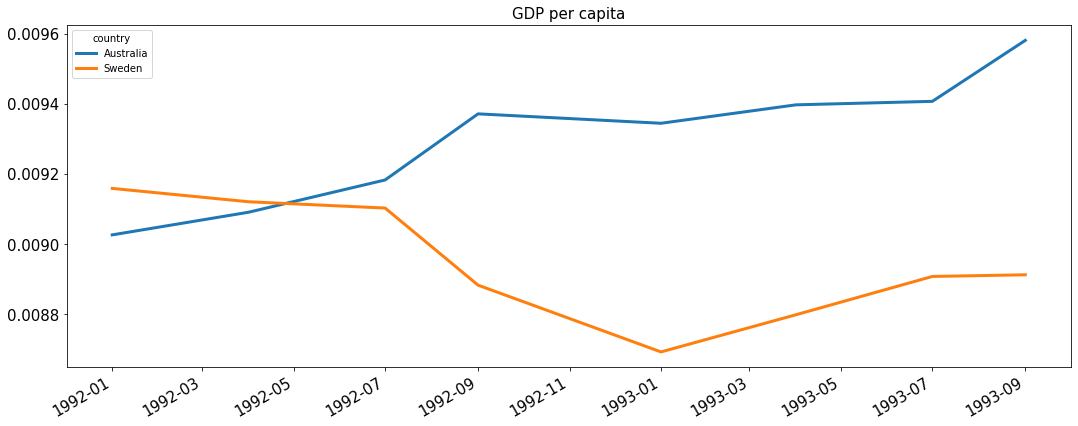

In [78]:
recent.plot(figsize = (18, 7), linewidth = 3)
plt.title("GDP per capita", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

### Select the right .melt() arguments

In [80]:
im = pd.read_csv("inflation_melt.csv")
im

,country,indicator,2017,2018,2019
0,Brazil,Inflation %,3.45,3.66,3.73
1,Canada,Inflation %,1.60,2.27,1.95
2,France,Inflation %,1.03,1.85,1.11
3,India,Inflation %,2.49,4.86,7.66


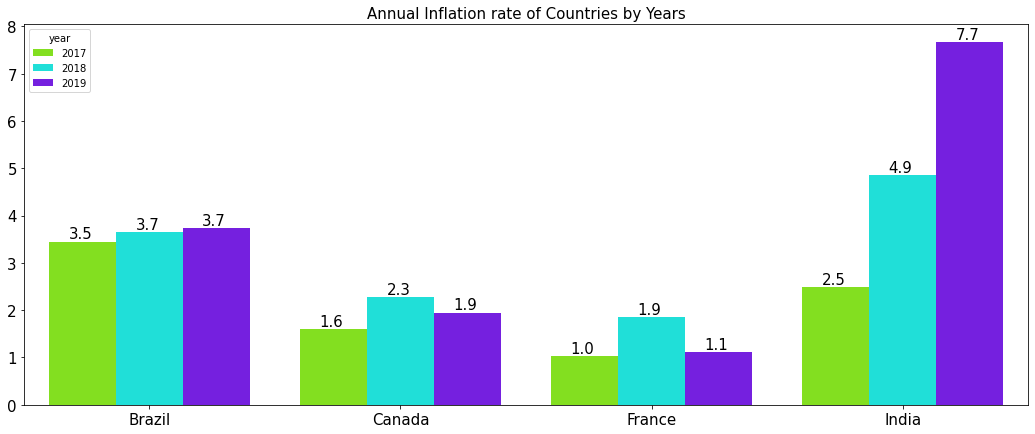

In [89]:
ims = im.melt(["country", "indicator"], var_name = "year", value_name = "annual")

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "country", y = "annual", hue = "year", data = ims, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.125, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Annual Inflation rate of Countries by Years", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Using .melt() to reshape government data

In [121]:
urm = pd.read_csv("ur_wide.csv")
urm

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


### Fill Missing Values with Null

In [122]:
urm["apr"] = urm["apr"].fillna(urm["apr"].mean())

urm["may"] = urm["may"].fillna(urm["may"].mean())

urm["jun"] = urm["jun"].fillna(urm["jun"].mean())

urm["jul"] = urm["jul"].fillna(urm["jul"].mean())

urm["aug"] = urm["aug"].fillna(urm["aug"].mean())

urm["sep"] = urm["sep"].fillna(urm["sep"].mean())

urm["oct"] = urm["oct"].fillna(urm["oct"].mean())

urm["nov"] = urm["nov"].fillna(urm["nov"].mean())

urm["dec"] = urm["dec"].fillna(urm["dec"].mean())

In [123]:
urm

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.90,9.60,9.40,9.40,9.50,9.50,9.40,9.8,9.30
1,2011,9.1,9.0,9.0,9.10,9.00,9.10,9.00,9.00,9.00,8.80,8.6,8.50
2,2012,8.3,8.3,8.2,8.20,8.20,8.20,8.20,8.10,7.80,7.80,7.7,7.90
3,2013,8.0,7.7,7.5,7.60,7.50,7.50,7.30,7.20,7.20,7.20,6.9,6.70
4,2014,6.6,6.7,6.7,6.20,6.30,6.10,6.20,6.10,5.90,5.70,5.8,5.60
5,2015,5.7,5.5,5.4,5.40,5.60,5.30,5.20,5.10,5.00,5.00,5.1,5.00
6,2016,4.9,4.9,5.0,5.00,4.80,4.90,4.80,4.90,5.00,4.90,4.7,4.70
7,2017,4.7,4.6,4.4,4.40,4.40,4.30,4.30,4.40,4.20,4.10,4.2,4.10
8,2018,4.1,4.1,4.0,4.00,3.80,4.00,3.80,3.80,3.70,3.80,3.7,3.90
9,2019,4.0,3.8,3.8,3.60,3.60,3.70,3.70,3.70,3.50,3.60,3.5,3.50


In [124]:
urm_ = urm.melt("year", var_name = "month", value_name = "unemployment")
urm_

,year,month,unemployment
0,2010,jan,9.80
1,2011,jan,9.10
2,2012,jan,8.30
3,2013,jan,8.00
4,2014,jan,6.60
...,...,...,...
127,2016,dec,4.70
128,2017,dec,4.10
129,2018,dec,3.90
130,2019,dec,3.50


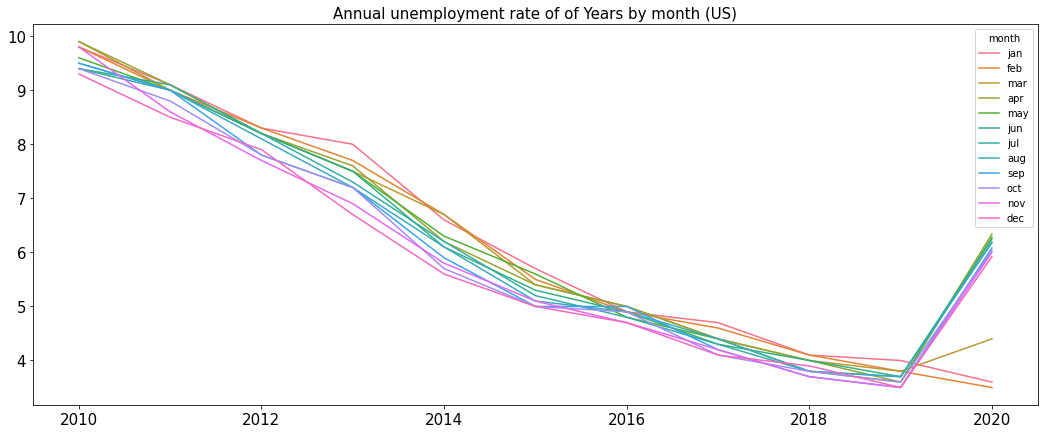

In [125]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "year", y = "unemployment", hue = "month", data = urm_)
plt.title("Annual unemployment rate of of Years by month (US)", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Combine year and month**

In [126]:
urm_["date"] = pd.to_datetime(urm_["year"].apply(str) + "-" + urm_["month"])
urm_ = urm_[urm_.columns.drop(["year", "month"])]
urm_

,unemployment,date
0,9.80,2010-01-01
1,9.10,2011-01-01
2,8.30,2012-01-01
3,8.00,2013-01-01
4,6.60,2014-01-01
...,...,...
127,4.70,2016-12-01
128,4.10,2017-12-01
129,3.90,2018-12-01
130,3.50,2019-12-01


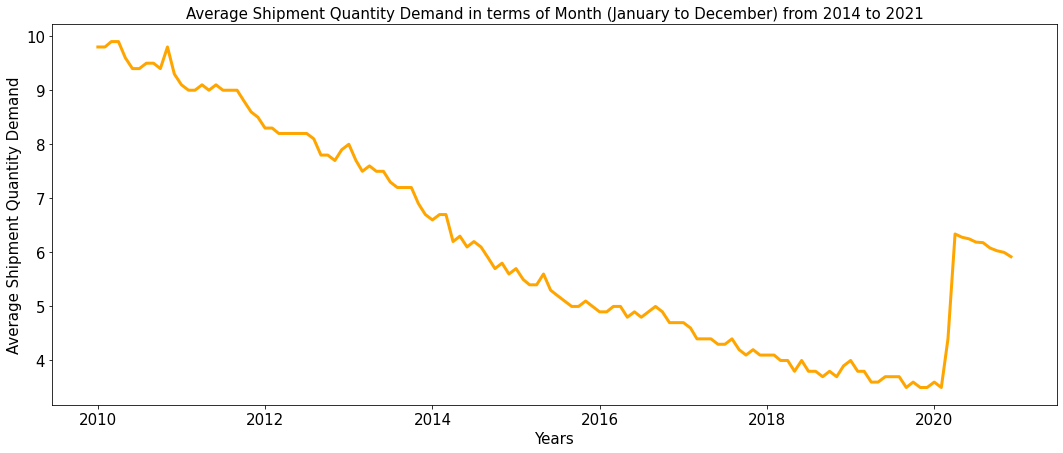

In [132]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = "date", y = "unemployment", data = urm_, linewidth = 3, color = "orange")
plt.title("Average Shipment Quantity Demand in terms of Month (January to December) from 2014 to 2021", size = 15)
plt.xlabel("Years", size = 15)
plt.ylabel("Average Shipment Quantity Demand", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()